In [1]:
# deadline = 13 jan 2023

<b>Have to use the efficient and non efficient mode in the report </b>

In [2]:
# page 16 in slide 08 is important 

# Description
Devise an antiplagiarism software specialized on poems. For simplicity, assume that the software is able to detect sentences taken from "La Divina Commedia" by Dante Alighieri. The text of the poem can be downloaded from here. 





The software must detect sentences of a given size S in terms of words. Focus on the specific case S=6. 

Compare the performance and the memory occupancy of the anti-plagiarism system for S=6 based on:

a set storing the sentences
a set storing the fingerprints of the sentences 
a bit string array
a optimally-designed bloom filter
Preliminary study:

What are the inputs and the outputs of the software?
Evaluate the number of sentences that are stored for S=6. 
Evaluate the average size of each sentences in bytes.
Set of sentences:

What is the corresponding memory occupancy?
<b>Fingerprint set</b>:

By simulation, evaluate Bexp defined as the minimum value of bits such that no collisions are experienced when storing all the sentences in a fingerprint set.
Compute analytically the number of bit Bteo necessary to get a probability 0.5 of fingerprint collision when storing all the sentences with a fingerprint set.

Compute the probability of false positive for a fingerprint set in which the number of bits is Bexp, as computed in question 1.

Is Bteo a good approximation of Bexp?

<b>Bit string array:</b>

By simulation, evaluate the probability of false positive in function of memory X, for X in the interval [2^{19}, 2^{20}, 2^{21}, 2^{22}, 2^{23}] bits, and plot the corresponding graph.

By theory, evaluate the probability of false positive in function of X, and plot the corresponding graph.

Compare the simulation with the theoretical results.

How this solution compares with the fingerprint set above with Bexp bits?

<b>Bloom filters:</b>


Compute analytically the optimal number of hash functions in function of memory X, for X in the interval [2^{19}, 2^{20}, 2^{21}, 2^{22}, 2^{23}] bits, and plot the corresponding graph. 
By theory, evaluate the probability of false positive in function of X, using the optimal number of hash functions.
Describe how you implemented the different hash functions.
By simulation, evaluate the probability of false positive in function of X, using the optimal number of hash functions, and plot the corresponding graph.
Compare the simulation results with the results obtained by just analytical formulas. 
(optional) It can be shown that the number of distinct elements stored in a bloom filter with n bits and k hash functions can be estimated as  -\frac{n}{k}\ln \big(1-\frac{N}{n}\big)   where N is the actual number of bits equal to 1 in the bloom filter. Show how accurate is the formula when inserting one single sentence at the time in the bloom filter, in function of the inserted sentences.



Finally, discuss the different tradeoff between memory and performance achieved each data structure, based on the results above summarizied in the following table.

Data structure	Memory [kB]	Prob. false positive
Set of sentences		
Fingerprint set (X=Bexp)		
Bit string array (X varying)		
Bloom filter (X varying)		

What is the best option for this scenario?


In [3]:
# I have to read the bloom filters pdf and also watch video for the firsrsession of 19th of December 

In [4]:
# Q:what is the formula we should use for the analytical part?
#A: explained in the layers parts 
#when will he upload the video of the first session?
#A: He will upoload it but idk when
# by simulation: obvious, Analytically = formulas(maybe), theory?
# theory and analytically are the same 
#Slide 08/ page 16 is important (it’s what we have to keep in mind)
#It’s useful for set of fingerprints question 2 
# we should watch the video fro this session to be able to run the simulation (19th of December, session one)
# page 28 and 29 are important for the bloom filter 
# formula is page 28 gives us a real number and we have to either use 12 or 13, we have to choose the optimal value
# since bloom filters do not work with real numbers 
# for bloom filters, question 1 and two are different but somehow related
#the formula in page 29 is important but only the first part = (1-P) ** K (only this part is important)

In [5]:
# we have to check the lenght of the hash before anfter the set in order to find collisions 

In [6]:
import hashlib
import re
from pympler import asizeof
import math
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#############################################33
file = open("commedia.txt", "rt")
data = file.read()

In [8]:
#===========================
data=re.sub(r"[^\w\d'\s]+",'',data) # deleting the punctuations
words = data.split('\n')
del words[0:8]
clean_words=[]
for line in words.copy():
    if line.startswith("Inferno") or line.startswith("Purgatorio") or line.startswith("Paradiso")or not line.strip():
        words.remove(line) # deleting the headers 
    else:
        line = line.strip()
        splited_words = line.split(" ")
        clean_words.extend(splited_words)
print('the total number of words is \n')
print(len(clean_words)) #counting the number of words 
##############################################

the total number of words is 

96929


In [9]:
asizeof.asizeof(clean_words)
#it's in bytes

6055040

In [10]:
print(f'number of distinct words is equal to {len(set(clean_words))}')

number of distinct words is equal to 14642


In [11]:
plagiarism_size= 6 #window size 
verses = []
finger_prints=[]
verse_count=0



for i in range (len(clean_words)):
    if len(clean_words[i:i+plagiarism_size])==plagiarism_size:
        verses.append(' '.join(clean_words[i:i+plagiarism_size]))

verses_set=set(verses)    
m = len(verses_set)
epsilon = 10 ** -5
b = math.ceil(math.log((m/epsilon) , 2 )) # b has to larger or equal to this value 
n = 2 ** b


for i in verses_set:
    temp=i
    encoded=temp.encode('utf-8')
    hashed=hashlib.md5(encoded)
    int_hashed=int(hashed.hexdigest(), 16)
    h = int_hashed % n
    finger_prints.append(h)


        
        
#we should store the fingerprints in a hashtable 
#then we should computer and store the finger prints inside of a hashtable 
print(f'\ntotal number of verses is {len(verses)} \n')
print(f'\ntotal number of verses(set) is {len(verses_set)} \n')



total number of verses is 96924 


total number of verses(set) is 96828 



In [12]:
len(finger_prints) #we give the fingerprints the set version of verses

96828

In [13]:
b

34

In [14]:
finger_prints_set=set(finger_prints)
# len(finger_prints_set)

<b>we check the length of finger prints and the length of the set of finger prints and if there's any difference, it means that<br>
there's a collision<br>
we check the fingerprints since it's the fingerprints that help us find plagiarism <br> 

</b>

In [15]:
print (f'the number of collisions are {len(finger_prints)-len(finger_prints_set)}')

the number of collisions are 0


In [16]:
#it's better to have both fingerprints and the verses stored in a dictionary 
# so we're gonna do it from the beginning
new_verses=[]
# m = len(verses) 
# we already have the value for m , b , epsilon and n since we've ran the code before
# epsilon = 10 ** -4
# b = math.log((m/epsilon) , 2 ) # b has to larger or equal to this value 
# n = m * b
general_dict={}

for i in range (len(clean_words)):
    if len(clean_words[i:i+plagiarism_size])==plagiarism_size:
        new_verses.append(' '.join(clean_words[i:i+plagiarism_size]))
        temp=new_verses[i]
        encoded=temp.encode('utf-8')
        hashed=hashlib.md5(encoded)
        int_hashed=int(hashed.hexdigest(), 16)
        h = int_hashed % n
        finger_prints.append(h)
        if h in general_dict.keys():
            general_dict[h] + " , " + temp
        else:
            temp_dict={h:temp}
            general_dict.update(temp_dict)

# Fingerprint set:

In [17]:
# for lab 17 the fingerprints part we have to chagne the epsilon between 10 ** -5 and 10 ** -6 to find the minimum number of bits  

In [18]:
r=np.linspace(0.0001,0.000001,1000).tolist()

In [19]:
r

[0.0001,
 9.99009009009009e-05,
 9.980180180180181e-05,
 9.970270270270271e-05,
 9.960360360360361e-05,
 9.950450450450451e-05,
 9.940540540540541e-05,
 9.930630630630632e-05,
 9.920720720720722e-05,
 9.910810810810812e-05,
 9.900900900900902e-05,
 9.890990990990991e-05,
 9.881081081081081e-05,
 9.871171171171171e-05,
 9.861261261261261e-05,
 9.851351351351351e-05,
 9.841441441441442e-05,
 9.831531531531532e-05,
 9.821621621621622e-05,
 9.811711711711712e-05,
 9.801801801801802e-05,
 9.791891891891892e-05,
 9.781981981981983e-05,
 9.772072072072073e-05,
 9.762162162162163e-05,
 9.752252252252253e-05,
 9.742342342342343e-05,
 9.732432432432433e-05,
 9.722522522522523e-05,
 9.712612612612614e-05,
 9.702702702702704e-05,
 9.692792792792794e-05,
 9.682882882882883e-05,
 9.672972972972973e-05,
 9.663063063063063e-05,
 9.653153153153153e-05,
 9.643243243243243e-05,
 9.633333333333333e-05,
 9.623423423423424e-05,
 9.613513513513514e-05,
 9.603603603603604e-05,
 9.593693693693694e-05,
 9.58378

In [20]:
# in this section we try to find the right value for b and the right value for epsilon 
plagiarism_size= 6 #window size 
verses = []
verse_count=0



for i in range (len(clean_words)):
    if len(clean_words[i:i+plagiarism_size])==plagiarism_size:
        verses.append(' '.join(clean_words[i:i+plagiarism_size]))

verses_set=set(verses)    
m = len(verses_set)
for j in range(10, 0, -1):
    epsilon = j * (10 ** -5)
    b = math.ceil(math.log((m/epsilon) , 2 )) # b has to larger or equal to this value 
    n = 2 ** b
    finger_prints=[]
    for i in verses_set:
        temp=i
        encoded=temp.encode('utf-8')
        hashed=hashlib.md5(encoded)
        int_hashed=int(hashed.hexdigest(), 16)
        h = int_hashed % n
        finger_prints.append(h)

    finger_prints_set=set(finger_prints)
    if (len(finger_prints)-len(finger_prints_set) == 0):
        print (f'the value for epsilon is equal to  {epsilon} and the value of b is equal to {b}\n')


the value for epsilon is equal to  1e-05 and the value of b is equal to 34



In [21]:
#min bit = 33 and epsilon = 2e-05
# have to find the min value for collisioin and the value for it's b 

In [22]:
# a collision happens when 2 items have the same hash value

In [23]:
# the fingerprints part is over since the other stuff are theoratical  and we have the answers 
#2 and 4 are avilabe in a picture 
#for number 3 , we have to do what we've done for number 1 but reverse like we have to go through different values of b 
# and compute the epsilon

# Bit string array:

In [24]:
# question 1 has to be done through simulation so it needs coding 
# 2 , 3, 4 don't need coding 

In [25]:
#1 
# different values for epsilon for 

In [26]:
m = len(verses_set) 
b = [i for i in range(19,24)]
n= [2**i for i in b] 

In [27]:
# now based on the value of b and n we have to find different values for epsilon

In [28]:
# page 21 slide 12 I think it's used for question one  of bit string array 
# I think we can use the second scenario

n = m/epsilon <br>
b = log( m/epsilon ,base = 2) <br>
n = 2 ** b = m / epsilon bits  <br>
 based on above  <br>
 epsilon = m / 2 ** b

In [32]:
epsilons = []
for i in n:
    epsilons.append(m/i)

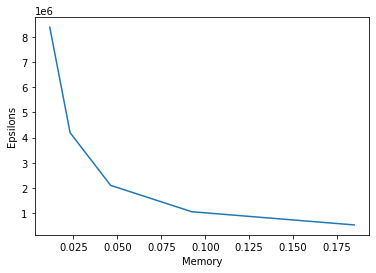

In [34]:
plt.plot(epsilons,n)
plt.ylabel('Epsilons')
plt.xlabel('Memory')
plt.show()